# DESCRIPTION

### Objective: Make a model to predict the app rating, with other information about the app provided.
### Problem Statement:
Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility. This feature will help bring more attention to newer apps that have the potential.

### Domain: General
Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

In [2]:
import sys # importing the sys module

print (sys.version) 

3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Steps to perform:

## 1. Load the data file using pandas.

In [6]:
inp0 = pd.read_csv("googleplaystore.csv")

In [7]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values in the data. Get the number of null values for each column.

In [10]:
inp0.isnull() #Checking if we have null values in the data set

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Checking Total number of null values present in our dataset


In [12]:
inp0.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns.


#### Dropping the records with null ratings
- this is done because ratings is our target variable

In [15]:
inp0_Null_dropped = inp0.dropna(how = 'any')

In [16]:
print ("Shape of the data set Before deletiopn: ", inp0.shape)
print ()
print ("Shape of the data set After deletion: ", inp0_Null_dropped.shape)

Shape of the data set Before deletiopn:  (10841, 13)

Shape of the data set After deletion:  (9360, 13)


### Total percentage of the data we will end up after deletion

In [18]:
Deleted_data = (10841-9360)/10841*100
Deleted_data

13.661101374411954

### As the deleted data is less than 20% of the data set, therefore it is good to go with the deletion of the rows having null values.

#### Checking if the no null values left in our data set. 

In [21]:
inp0_Null_dropped.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [22]:
inp0_Null_dropped.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [23]:
inp0.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [24]:
inp0_Null_dropped.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [25]:
inp0_Null_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## 4. Variables seem to have incorrect type and inconsistent formatting. We need to fix them:


#### 1. Size column has sizes in Kb as well as Mb. To analyze, we’ll need to convert these to numeric. 
###### a. Extract the numeric value from the column 
###### b. Multiply the value by 1,000, if size is mentioned in Mb


#### 2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).


#### 3. Installs field is currently stored as string and has values like 1,000,000+. 
###### a. Treat 1,000,000+ as 1,000,000 
###### b. remove ‘+’, ‘,’ from the field, convert it to integer


#### 4. Price field is a string and has Dollar symbol.  Remove "$" sign, and convert it to numeric.

In [27]:
# write a function 'change_size', 
# if there is M which is size in MB, delete the last element, mutiply it with 1000 and convert it to float 
# if there is k which is size in kB, delete the last element and convert it to float
# otherwise return None

In [28]:
def change_size(size):
    if 'M' in size:
        x=size[:1]
        x=float(x)*1000
        return(x)
    elif 'k' in size:
        x=size[:1]
        x=float(x)
        return (x)
    else:
        return None

inp0_Null_dropped["Size"]= inp0_Null_dropped["Size"].map(change_size)

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_20192\1605607338.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0_Null_dropped["Size"]= inp0_Null_dropped["Size"].map(change_size)


Once we have defined the function and applied to our dataset "Google PlayStore", size will get converted to KB with no symbol.

Howwever if we check in some places it was mentioned that the size of the appication varies device to device which can not be converted to float hence we will get Null values at those place. Hence it will be required to fill those place. 

In [30]:
inp0_Null_dropped.Size.describe()

count    7723.000000
mean     3527.798006
std      2465.154763
min         1.000000
25%      1000.000000
50%      3000.000000
75%      5000.000000
max      9000.000000
Name: Size, dtype: float64

#### Check the total count for null values in the size coulmn 

In [32]:
inp0_Null_dropped["Size"].isnull().sum()

1637

In [33]:
inp0_Null_dropped.Size.fillna(method = 'ffill', inplace = True)

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_20192\570805697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0_Null_dropped.Size.fillna(method = 'ffill', inplace = True)


In [34]:
inp0_Null_dropped["Size"].isnull().sum()

0

In [35]:
inp0_Null_dropped.Size.describe()

count    9360.000000
mean     3518.941239
std      2460.319120
min         1.000000
25%      1000.000000
50%      3000.000000
75%      5000.000000
max      9000.000000
Name: Size, dtype: float64

### 4.2 Converting reviews to numeric
#### Reviews is a numeric field that is loaded as a string field. We need to Convert it to numeric (int/float).



In [37]:
inp0_Null_dropped.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [38]:
inp0_Null_dropped['Reviews'] = inp0_Null_dropped['Reviews'].astype(float)

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_20192\3402165802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0_Null_dropped['Reviews'] = inp0_Null_dropped['Reviews'].astype(float)


In [39]:
inp0_Null_dropped.Reviews.info()

<class 'pandas.core.series.Series'>
Index: 9360 entries, 0 to 10840
Series name: Reviews
Non-Null Count  Dtype  
--------------  -----  
9360 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


4.3 Now, handling the installs column
Installs field is currently stored as string and has values like 1,000,000+.

a. Treat 1,000,000+ as 1,000,000 b. remove ‘+’, ‘,’ from the field, convert it to integer

In [41]:
def clean_installs(installs):
    
    if isinstance(installs, str):
        # Remove + sign and commas
        installs = installs.replace('+', '').replace(',', '').strip()
        try:
            # Convert to float
            return float(installs)
        except ValueError:
            return None  # Return None if conversion fails
    elif isinstance(installs, (int, float)):
        # Return the price as is if it's already numeric
        return float(installs)
    else:
        return None  # Return None for other types

In [42]:
inp0_Null_dropped['Installs'] = inp0_Null_dropped['Installs'].map(clean_installs)

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_20192\43025988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0_Null_dropped['Installs'] = inp0_Null_dropped['Installs'].map(clean_installs)


In [43]:
inp0_Null_dropped.Installs.info()

<class 'pandas.core.series.Series'>
Index: 9360 entries, 0 to 10840
Series name: Installs
Non-Null Count  Dtype  
--------------  -----  
9360 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [44]:
inp0_Null_dropped.Installs.isna().sum() # just checking if we have any Null values in the Column Installs

0

### 4.4 Price column needs to be cleaned



### Price field is a string and has dollar symbol. Remove dollar  sign, and convert it to numeric.

In [47]:
inp0_Null_dropped.Price.value_counts()[:5]

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

Price field is a string and has Dollar symbol. Remove "$" sign, and convert it to numeric

In [49]:
def clean_price(price):
    if '$' in price:
        x=price[1:]
        x=float(x)
        return(x)
    elif '0' in price:
        x=price[0:]
        x=float(x)
        return (x)
    else:
        return None
   

In [50]:
inp0_Null_dropped['Price'] = inp0_Null_dropped.Price.map(clean_price)

C:\Users\PRERNA\AppData\Local\Temp\ipykernel_20192\1836118890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp0_Null_dropped['Price'] = inp0_Null_dropped.Price.map(clean_price)


In [51]:
inp0_Null_dropped.Price.info()

<class 'pandas.core.series.Series'>
Index: 9360 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
9360 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [52]:
inp0_Null_dropped.Price.info()

<class 'pandas.core.series.Series'>
Index: 9360 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
9360 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [53]:
inp0_Null_dropped.Price.isnull().sum()

0

## 5. Some sanity checks
- 1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
- 2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
- 3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

#### 5.1   Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [56]:
df = inp0_Null_dropped # for the easy use, just changed the dataframe from inp0_Null_dropped into df

In [57]:
df.Rating.describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

#### As the minimum value of column Ratings is 1 and maximum value is 5, hence no records needs to be deleted

### 5.2. Reviews should not be more than installs as only those who installed can review the app.

##### Checking if reviews are more than installs. Counting total rows like this.

In [61]:
df[df.Reviews>df.Installs].shape[0]  


7

#####  In the above code **df[df.Reviews>df.Installs]**--> Checks the rows if any, and **shape[0]** provides the count, as its a tupple we need to give the index number as well. 

In [63]:
df[df.Reviews>df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4.0,2000.0,1.0,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249.0,3000.0,10000.0,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2.0,2000.0,1.0,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7.0,1000.0,5.0,Free,0.00,Everyone,Arcade,"July 23, 2018",1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11.0,6000.0,10.0,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20.0,4000.0,10.0,Free,0.00,Teen,Social,"July 23, 2018",1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2.0,1000.0,1.0,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up


#### As there are 7 rows which do not satifies our condition hence needs to drop them. 

In [65]:
df = df[df.Reviews<=df.Installs].copy()

#### Here we have retain that part of data where revives are less than installs

In [67]:
df.shape

(9353, 13)

## 5.3 For free apps (type = “Free”), the price should not be > 0. Drop any such rows.

In [69]:
len(df[(df.Type == "Free") & (df.Price>0)])

0

##### We do not have any rows having free apps with more than 0 price with below code 
--- **or we can check the same with below code as well**

In [71]:
df[(df.Type == "Free") & (df.Price>0)].shape[0]  

0

##  Performing univariate analysis:
- Boxplot for Price
    -- Are there any outliers? Think about the price of usual apps on Play Store
- Boxplot for Reviews
  -- Are there any apps with very high number of reviews? Do the values seem right
- Histogram for Rating
  -- How are the ratings distributed? Is it more toward higher ratings?
- Histogram for Size

### Drafting Boxplot for Price

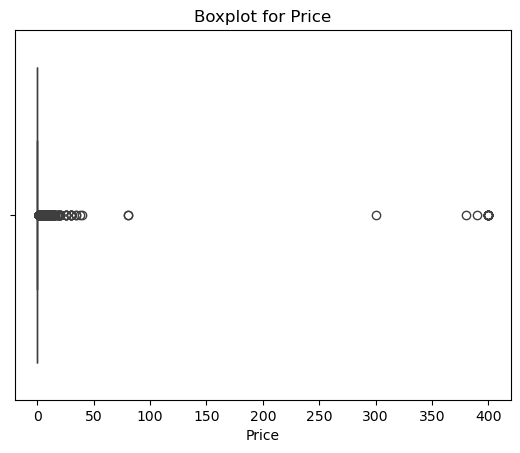

In [74]:
sns.boxplot(x = df.Price).set(title = "Boxplot for Price");

### Drafting Boxplot for Reviews

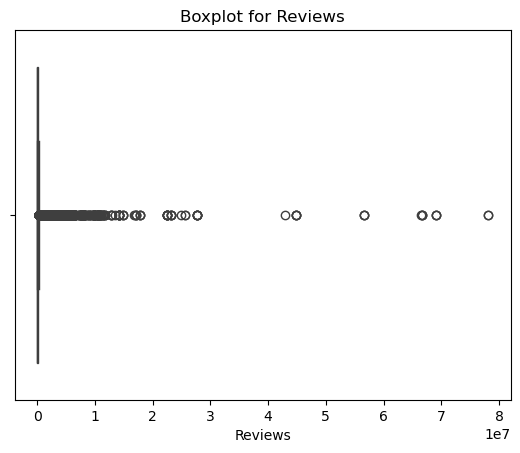

In [76]:
sns.boxplot(x = df.Reviews).set(title = "Boxplot for Reviews");

### Drafting Histogram for Rating

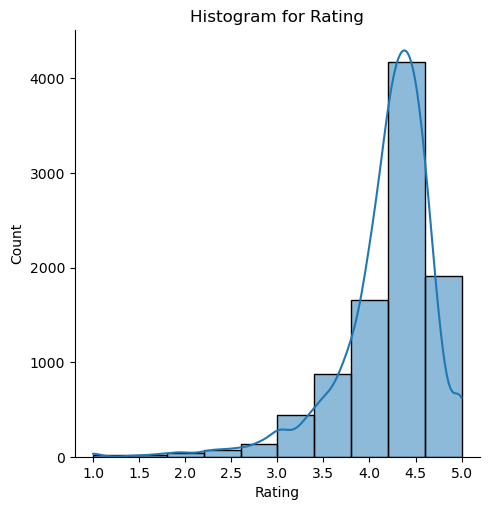

In [78]:
sns.displot(df['Rating'], bins = 10, kde = True). set(title = "Histogram for Rating");

### Drafting Histogram for Size:

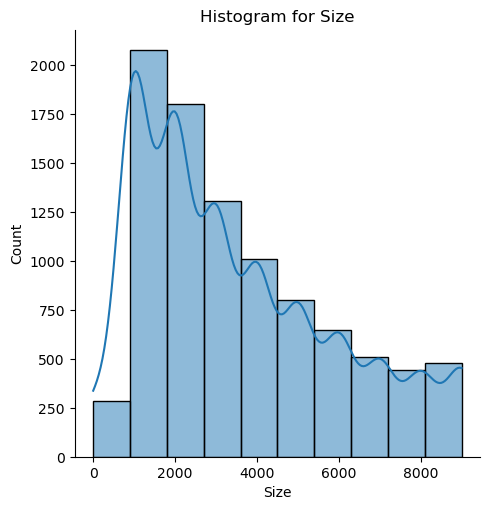

In [80]:
sns.displot(df['Size'], bins = 10, kde = True). set(title = "Histogram for Size");

### 6. Outlier treatment:¶
- a) **Price**: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious! a. Check out the records with very high price i. Is 200 indeed a high price? b. Drop these as most seem to be junk apps
- b) **Reviews**: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews
- c) **Installs**: There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis. a. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99 b. Decide a threshold as cutoff for outlier and drop records having values more than that

#### 6.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps

In [83]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,2000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1000.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8000.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2000.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4000.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2000.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,2000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,9.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


#### As we have 15 row having the price more than 200$

In [85]:
df[df.Price>200].shape[0]  

15

#### Drop the rows having the price more than 200$


Doing so, just work with rows having price less than 200$

In [88]:
df = df[df.Price<200].copy()

In [89]:
df.shape

(9338, 13)

#### 6.2 Reviews: 
Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [91]:
df.Reviews.describe()

count    9.338000e+03
mean     5.155865e+05
std      3.148627e+06
min      1.000000e+00
25%      1.880000e+02
50%      6.009000e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [92]:
df[df.Reviews>2000000].shape[0]

453

#### There are 453 rows having more than 2 million reviews. 
- We need to drop all these 453 rows as these rows do not require any analysis
- So work like perviously, consider the dataset having reviews less than 2 million

In [94]:
df = df[df.Reviews<2000000].copy()

In [95]:
df.shape

(8885, 13)

#### 6.3	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that

Dropping very high Installs values

In [97]:
df.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [98]:
df[df.Installs>=df.Installs.quantile(0.99)].shape[0]

142

In [99]:
### Below are the few rows having more than 99 percentile.  

In [100]:
df[df.Installs>df.Installs.quantile(0.99)].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,5000.0,1.000000e+09,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
3265,Gboard - the Google Keyboard,TOOLS,4.2,1859115.0,1000.0,5.000000e+08,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
3326,Gboard - the Google Keyboard,TOOLS,4.2,1859109.0,8000.0,5.000000e+08,Free,0.0,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
3473,Dropbox,PRODUCTIVITY,4.4,1861310.0,6000.0,5.000000e+08,Free,0.0,Everyone,Productivity,"August 1, 2018",Varies with device,Varies with device
3476,Google Calendar,PRODUCTIVITY,4.2,858208.0,1000.0,5.000000e+08,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


### Drop all these 142 rows.

In [102]:
df= df[df.Installs<df.Installs.quantile(0.99)].copy()

In [103]:
# Now check the shape of the dataset
df.shape

(8743, 13)

#### 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        a.	What pattern do you observe? Does rating increase with price?
    2.	Make scatter plot/joinplot for Rating vs. Size
        a.	Are heavier apps rated better?
    3.	Make scatter plot/joinplot for Rating vs. Reviews
        a.	Does more review mean a better rating always?
    4.	Make boxplot for Rating vs. Content Rating
        a.	Is there any difference in the ratings? Are some types liked better?
    5.	Make boxplot for Ratings vs. Category
        a.	Which genre has the best ratings?

##### For each of the plots above, note down your observation.

 ### 7.1.	Make scatter plot/joinplot for Rating vs Price
-     a.	What pattern do you observe? Does rating increase with price?

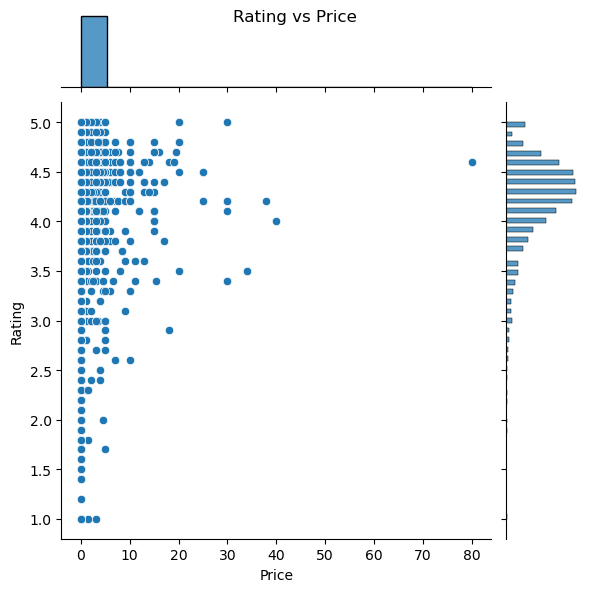

In [106]:
plot = sns.jointplot(y = df.Rating, x = df.Price, kind = 'scatter');
plot.fig.suptitle("Rating vs Price");

### 7.2	Make scatter plot/joinplot for Rating vs Size
     a.	Are heavier apps rated better?

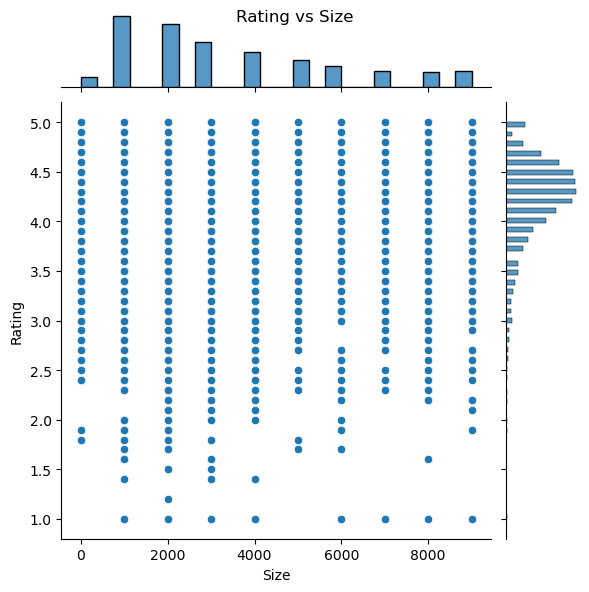

In [108]:
plot = sns.jointplot(y = df.Rating, x = df.Size, kind = 'scatter');
plot.fig.suptitle("Rating vs Size");

#### 7.3	Make scatter plot/joinplot for Rating vs Reviews
    a.	Does more review mean a better rating always?

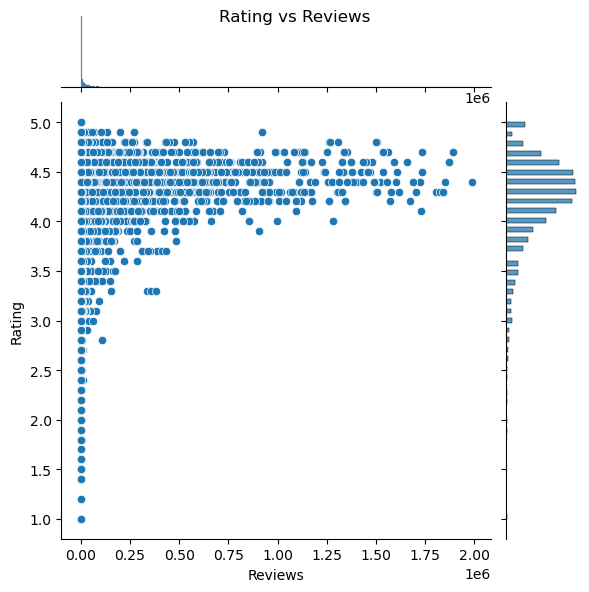

In [110]:
plot = sns.jointplot(y = df.Rating, x = df.Reviews, kind = 'scatter');
plot.fig.suptitle("Rating vs Reviews");

#### 7.4	Make boxplot for Rating vs Content Rating
    a.	Is there any difference in the ratings? Are some types liked better?

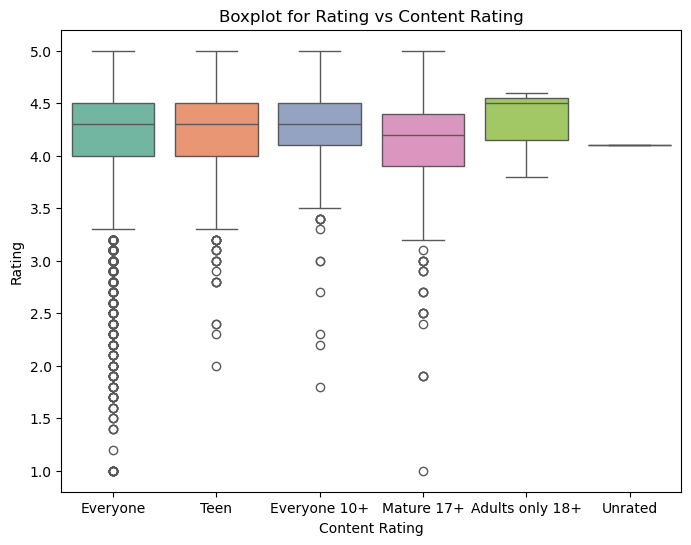

In [112]:

plt.figure(figsize=[8,6])
sns.boxplot(x=df['Content Rating'], y=df.Rating, palette = 'Set2').set(title ="Boxplot for Rating vs Content Rating");

#### 7.5	Make boxplot for Ratings vs. Category
    a.	Which genre has the best ratings?

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

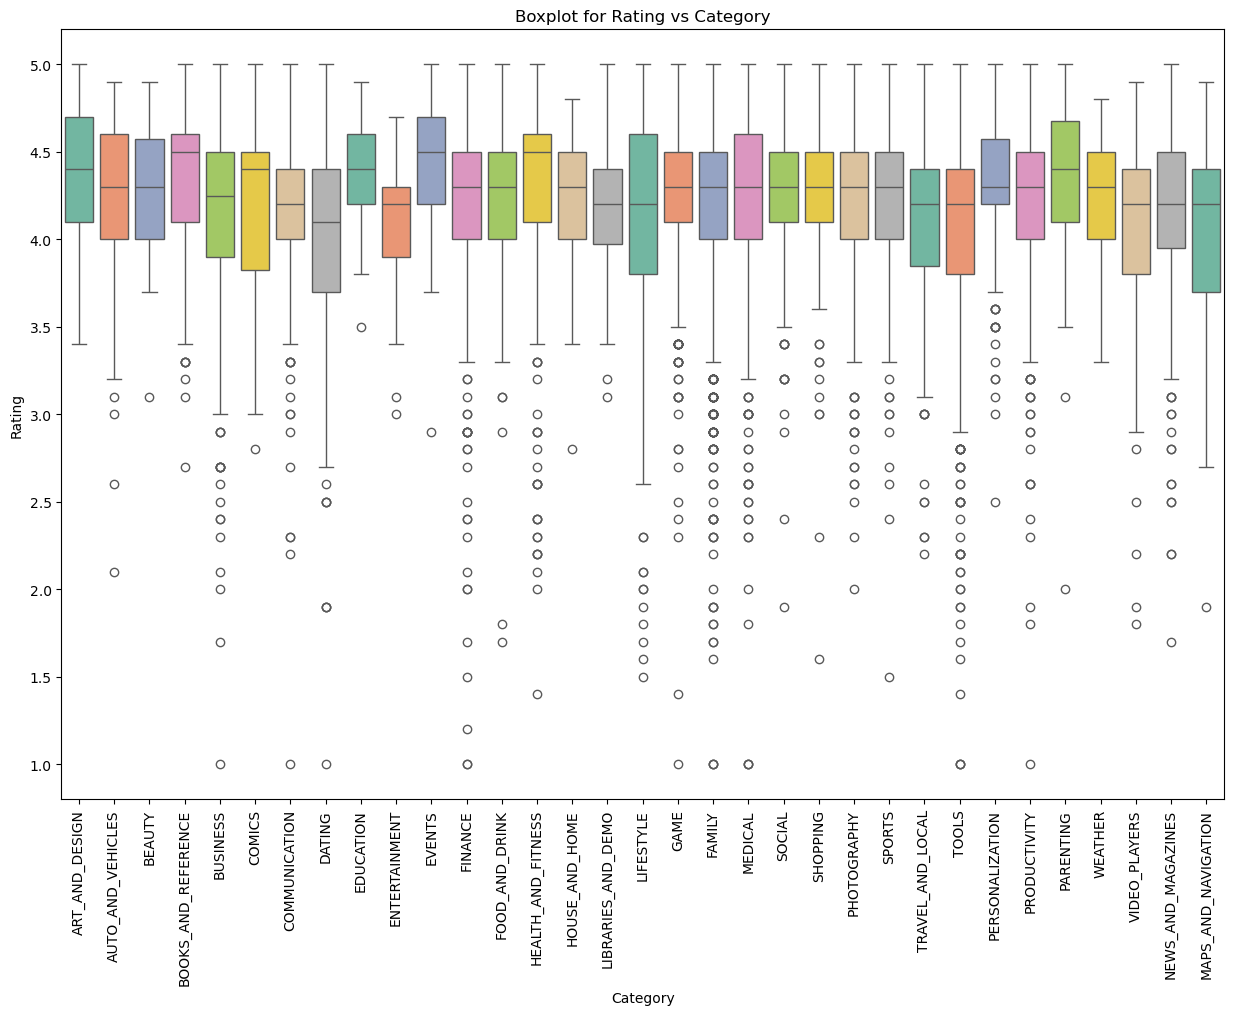

In [114]:
plt.figure(figsize=[15,10])
sns.boxplot(x=df.Category, y=df.Rating, palette = 'Set2').set(title ="Boxplot for Rating vs Category");
plt.xticks(rotation=90)

## 8 Data preprocessing

For the steps below, create a copy of the dataframe to make all the edits. Name it df1.

    1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
    2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
    3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


In [116]:
df1 = df.copy()

#### 8.1	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

# check describe for installs

In [119]:
df1.Installs.describe()

count    8.743000e+03
mean     3.486865e+06
std      8.659419e+06
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      5.000000e+06
max      5.000000e+07
Name: Installs, dtype: float64

In [120]:
df1.Installs = df1.Installs.apply(np.log1p)

In [121]:
df1.Installs.describe()

count    8743.000000
mean       11.878426
std         3.548943
min         1.791759
25%         9.210440
50%        11.512935
75%        15.424949
max        17.727534
Name: Installs, dtype: float64

In [122]:
# do same for reviews
df1.Reviews.describe()

count    8.743000e+03
mean     8.957859e+04
std      2.320521e+05
min      1.000000e+00
25%      1.490000e+02
50%      3.878000e+03
75%      5.023650e+04
max      1.986068e+06
Name: Reviews, dtype: float64

In [123]:
df1.Reviews = df1.Reviews.apply(np.log1p)
df1.Reviews.describe()

count    8743.000000
mean        7.934548
std         3.525097
min         0.693147
25%         5.010635
50%         8.263333
75%        10.824516
max        14.501668
Name: Reviews, dtype: float64

#### 8.2	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [125]:
df1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)

In [126]:
df1.shape

(8743, 9)

#### 8.3	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

Getting dummy variables for Category, Genres, Content Rating

In [128]:
df1.dtypes

Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
dtype: object

In [129]:
df2 = pd.get_dummies(df1, drop_first=True)

In [130]:
# Display column names after creating dummy
df2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [131]:
# Check the shape of the df2 
df2.shape

(8743, 157)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

Train - test split

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
# train_test_split

In [135]:
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)

In [136]:
df_train.shape, df_test.shape

((6120, 157), (2623, 157))

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [138]:
y_train = df_train.pop("Rating")
X_train = df_train

In [139]:
y_train

5705     3.3
2981     4.3
8381     4.2
10045    4.1
1822     4.3
        ... 
399      4.3
81       4.4
9869     3.4
8516     3.8
6791     3.8
Name: Rating, Length: 6120, dtype: float64

In [140]:
y_test = df_test.pop("Rating")
X_test = df_test

In [141]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6120, 156)
(6120,)
(2623, 156)
(2623,)


# Build the model

## 11 . Model building

In [144]:
X_train.columns

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=156)

In [145]:
from sklearn.linear_model import LinearRegression
# instantiate
linreg = LinearRegression()

# fit the model to the training data
linreg.fit(X_train, y_train)                   # training the model on training data. 

# print the intercept and coefficients
print (round(linreg.intercept_,3)) # B0
print (np.round(linreg.coef_,3)) # B1, B2, B3.....



4.469
[ 0.172  0.    -0.15   0.     0.137  0.216  0.183  0.079  0.341  0.059
  0.013  0.001 -0.098  0.274 -0.001  0.053  0.107  0.172  0.1    0.085
  0.128  0.096  0.032  0.125  0.08   0.183  0.164  0.095  0.082  0.113
  0.095  0.076  0.125  0.109 -0.045  0.111 -0.102 -0.049 -0.054 -0.062
 -0.047 -0.045  0.206 -0.064  0.119  0.469 -0.078  0.031  0.201  0.405
  0.471  0.624  0.267  0.137  0.216  0.006  0.079  0.322  0.     0.183
  0.195  0.079 -0.143 -0.01   0.584  0.035  0.025  0.132  0.47   0.349
  0.365  0.288  0.158 -0.247  0.588  0.059 -0.     0.013  0.336  0.585
  0.224  0.65   0.391  0.164  0.487 -0.099  0.232  0.631  0.063  0.417
  0.192  0.141  0.244  0.343  0.482 -0.     0.233  0.147  0.274  0.053
  0.107  0.1   -0.239  0.419  0.085  0.128  0.096  0.213  0.     0.032
  0.125 -0.062  0.59   0.365  0.08   0.228 -0.142 -0.09   0.187  0.164
  0.095  0.082  0.292  0.196  0.318  0.28   0.75  -0.084  0.333  0.
  0.086  0.123  0.    -0.085  0.113  0.116  0.27   0.178  0.106  0.095
  0

## Making predictions

In [147]:
# make predictions on the testing data
y_pred = linreg.predict(X_test)
y_pred[:5]

array([4.04471422, 3.96484951, 4.21178246, 4.51119308, 4.15425577])

## Model Evaluation

#### RMSE - Root Mean Squared Error

In [150]:
from sklearn.metrics import mean_squared_error

print (mean_squared_error(y_pred, y_test)) # MSE
round (mean_squared_error(y_pred, y_test, squared=False),3) # RMSE

# squared bool, default=True
# If True returns MSE value, if False returns RMSE value.

0.22941231984397548


0.479

## Evaluating R2.

In [152]:
from sklearn.metrics import r2_score
print (r2_score(y_test, y_pred)) # test data

0.15188037885278016
